#📌 Extracción

In [236]:
import pandas as pd

In [237]:
url = "https://raw.githubusercontent.com/Sebas1020h/Challenge-TelecomX-pt-1/main/TelecomX_Data.json"

In [238]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [240]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [241]:
customer_df = pd.json_normalize(df["customer"])
df = df.drop(columns=["customer"]).join(customer_df.add_prefix("customer_"))
df

,customerID,Churn,phone,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,0002-ORFBO,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9
1,0003-MKNFE,No,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9
2,0004-TLHLJ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4
3,0011-IGKFF,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13
4,0013-EXCHZ,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13
7263,9992-RRAMN,Yes,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22
7264,9992-UJOEL,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2
7265,9993-LHIEB,No,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67


In [242]:
phone_df = pd.json_normalize(df["phone"])
df = df.drop(columns=["phone"]).join(phone_df.add_prefix("phone_"))
df

,customerID,Churn,internet,account,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No
7263,9992-RRAMN,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes
7264,9992-UJOEL,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No
7265,9993-LHIEB,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No


In [243]:
account_df = pd.json_normalize(df["account"])
df = df.drop(columns=["account"]).join(account_df.add_prefix("account_"))
df

,customerID,Churn,internet,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,Yes,Yes,9,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,No,No,9,Yes,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,No,No,4,Yes,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,1,Yes,No,13,Yes,No,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Female,1,Yes,No,3,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Female,0,No,No,13,Yes,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,"{'InternetService': 'Fiber optic', 'OnlineSecu...",Male,0,Yes,No,22,Yes,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,No,No,2,Yes,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,"{'InternetService': 'DSL', 'OnlineSecurity': '...",Male,0,Yes,Yes,67,Yes,No,Two year,No,Mailed check,67.85,4627.65


In [244]:
internet_df = pd.json_normalize(df["internet"])
df = df.drop(columns=["internet"]).join(internet_df.add_prefix("internet_"))
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,...,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,One year,...,Mailed check,65.60,593.3,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Month-to-month,...,Mailed check,59.90,542.4,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Month-to-month,...,Electronic check,73.90,280.85,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Month-to-month,...,Electronic check,98.00,1237.85,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Month-to-month,...,Mailed check,83.90,267.4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,One year,...,Mailed check,55.15,742.9,DSL,Yes,No,No,Yes,No,No
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Month-to-month,...,Electronic check,85.10,1873.7,Fiber optic,No,No,No,No,No,Yes
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,Month-to-month,...,Mailed check,50.30,92.75,DSL,No,Yes,No,No,No,No
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,Two year,...,Mailed check,67.85,4627.65,DSL,Yes,No,Yes,Yes,No,Yes


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   account_Contract           7267 non-null   object 
 10  account_PaperlessBilling   7267 non-null   object 
 11  account_PaymentMethod      7267 non-null   object 
 12  account_Charges.Monthly    7267 non-null   float64
 13  account_Charges.Total      7267 non-null   objec

In [246]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0, "": 0})

In [247]:
# Definir el mapeo de valores
mapping = {"Yes": 1, "No": 0, "No internet service": 0, None: 0, "": 0}

# Lista de columnas a transformar
cols_to_convert = [
    "customer_Partner",
    "customer_Dependents",
    "phone_PhoneService",
    "phone_MultipleLines",
    "internet_OnlineSecurity",
    "internet_OnlineBackup",
    "internet_DeviceProtection",
    "internet_TechSupport",
    "internet_StreamingTV",
    "internet_StreamingMovies"
]

# Aplicar el mapeo a las columnas seleccionadas
df[cols_to_convert] = df[cols_to_convert].replace(mapping)

/tmp/ipython-input-1701040114.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_to_convert] = df[cols_to_convert].replace(mapping)


In [248]:
df["Cuentas_Diarias"] = df["account_Charges.Monthly"] / 30

print(df[["account_Charges.Monthly", "Cuentas_Diarias"]].head())

   account_Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [249]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,...,account_Charges.Monthly,account_Charges.Total,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,One year,...,65.60,593.3,DSL,0,1,0,1,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,Month-to-month,...,59.90,542.4,DSL,0,0,0,0,0,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Month-to-month,...,73.90,280.85,Fiber optic,0,0,1,0,0,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Month-to-month,...,98.00,1237.85,Fiber optic,0,1,1,0,1,1,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Month-to-month,...,83.90,267.4,Fiber optic,0,0,0,1,1,0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,One year,...,55.15,742.9,DSL,1,0,0,1,0,0,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Month-to-month,...,85.10,1873.7,Fiber optic,0,0,0,0,0,1,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,Month-to-month,...,50.30,92.75,DSL,0,1,0,0,0,0,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,Two year,...,67.85,4627.65,DSL,1,0,1,1,0,1,2.261667


#📊 Carga y análisis

In [250]:
df.describe()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_Charges.Monthly,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,64.720098,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,30.129572,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333


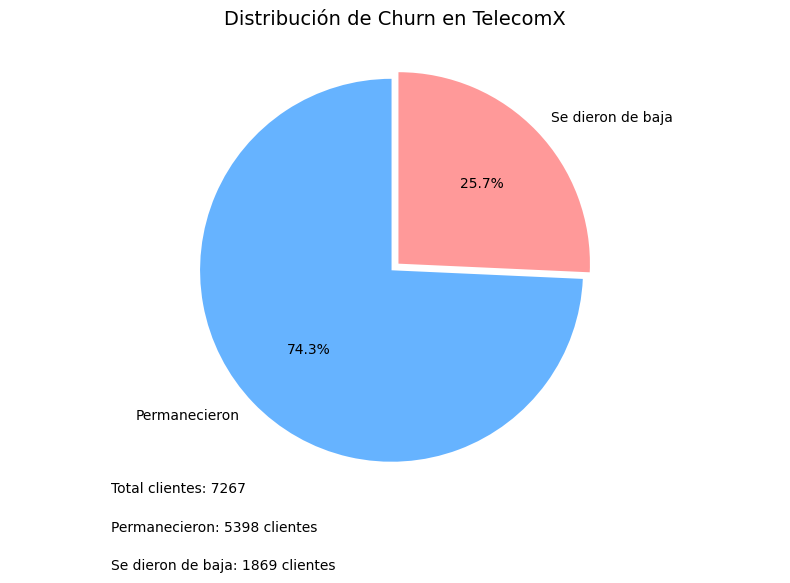

In [251]:
import matplotlib.pyplot as plt

# Contar los valores de Churn
churn_counts = df['Churn'].value_counts()

# Configurar el gráfico
plt.figure(figsize=(8, 6))
plt.pie(churn_counts,
        labels=['Permanecieron', 'Se dieron de baja'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=(0.05, 0))  # Separar ligeramente las porciones

# Añadir título
plt.title('Distribución de Churn en TelecomX', pad=20, fontsize=14)

# Mostrar el gráfico como un círculo perfecto
plt.axis('equal')

# Añadir información adicional
plt.text(-1.5, -1.2, f'Total clientes: {len(df)}', fontsize=10)
plt.text(-1.5, -1.4, f'Permanecieron: {churn_counts[0]} clientes', fontsize=10)
plt.text(-1.5, -1.6, f'Se dieron de baja: {churn_counts[1]} clientes', fontsize=10)

plt.tight_layout()
plt.show()

In [255]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,account_Contract,...,account_Charges.Monthly,account_Charges.Total,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,One year,...,65.6,593.3,DSL,0,1,0,1,1,0,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,Month-to-month,...,59.9,542.4,DSL,0,0,0,0,0,1,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Month-to-month,...,73.9,280.85,Fiber optic,0,0,1,0,0,0,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Month-to-month,...,98.0,1237.85,Fiber optic,0,1,1,0,1,1,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Month-to-month,...,83.9,267.4,Fiber optic,0,0,0,1,1,0,2.796667


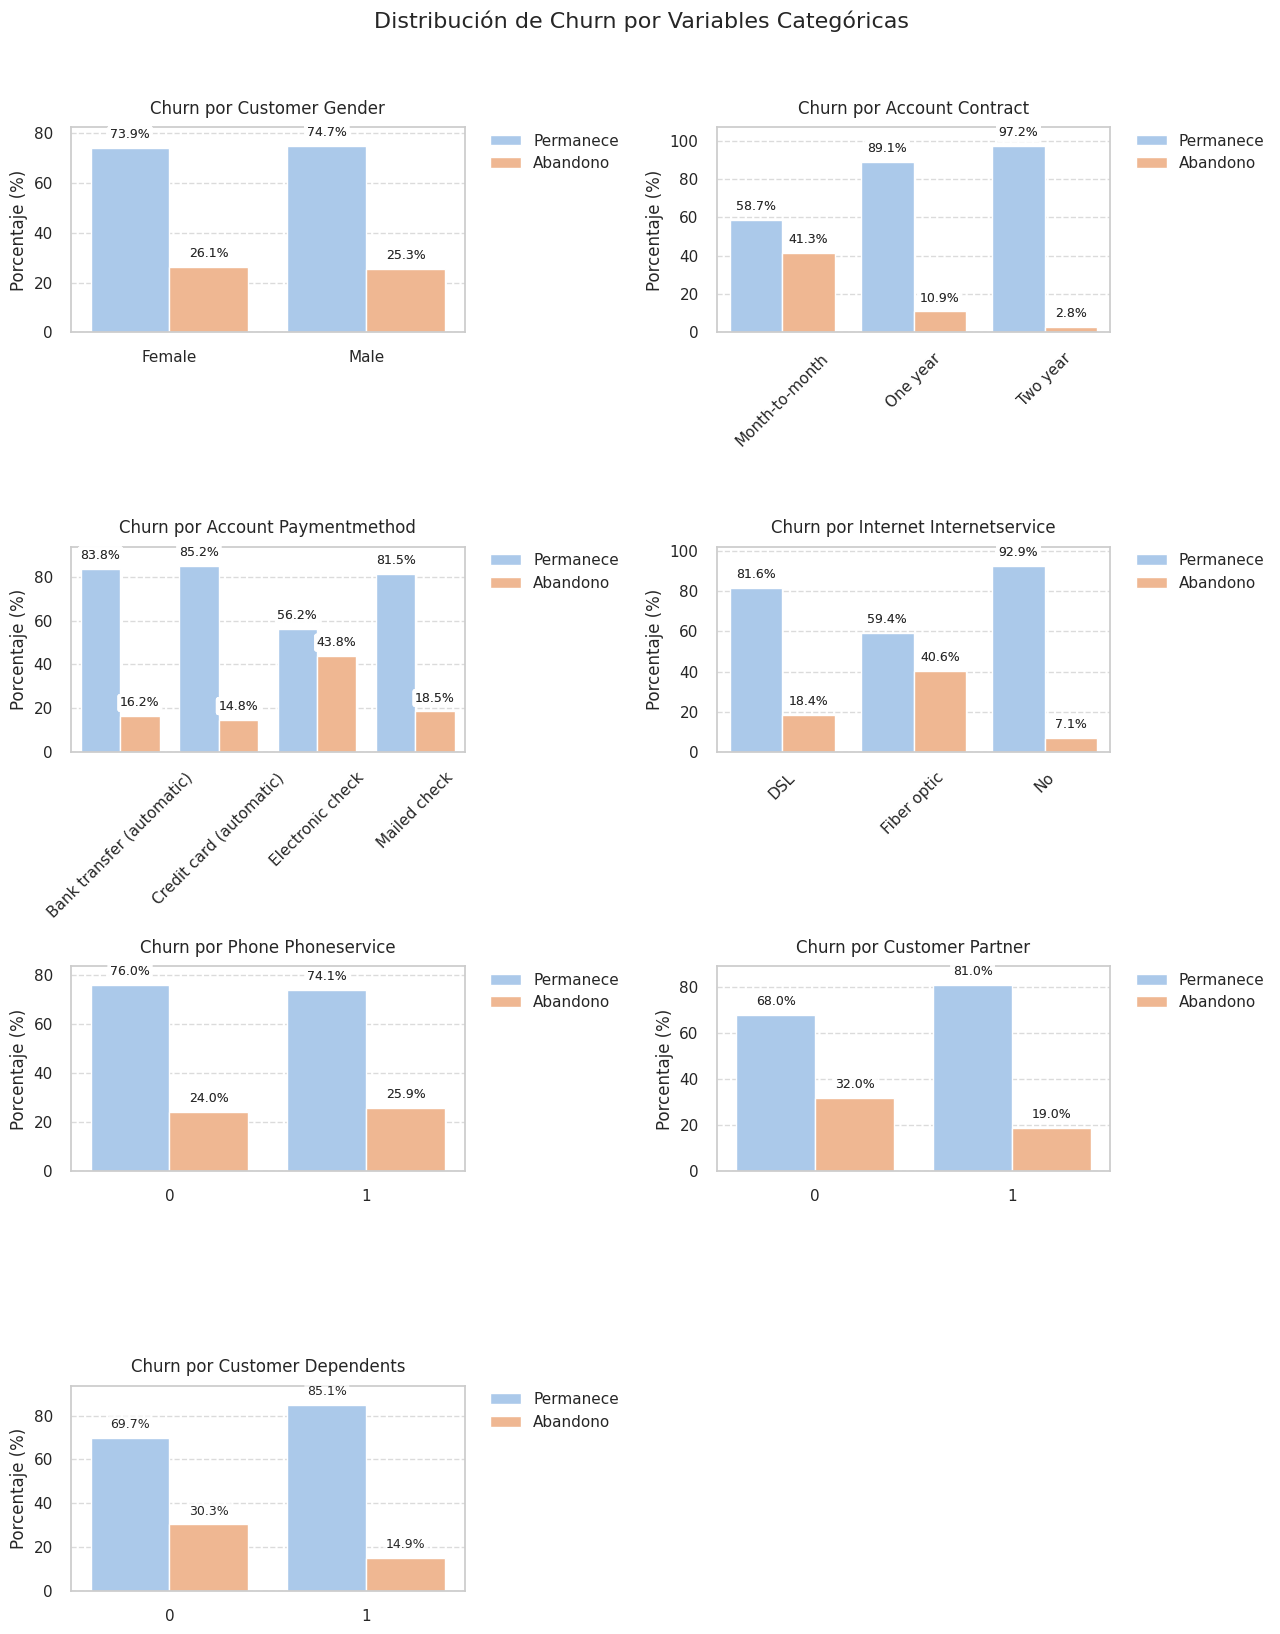

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
data = df

# Lista de variables categóricas a analizar
categorical_vars = [
    'customer_gender',
    'account_Contract',
    'account_PaymentMethod',
    'internet_InternetService',
    'phone_PhoneService',
    'customer_Partner',
    'customer_Dependents'
]

# Crear figura
fig, axes = plt.subplots(4, 2, figsize=(13, 16))
fig.suptitle('Distribución de Churn por Variables Categóricas', fontsize=16, y=1.02)
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    # Versión CORREGIDA: Calcular conteos en lugar de proporciones
    count_df = data.groupby([var, 'Churn']).size().reset_index(name='count')
    total_counts = data[var].value_counts()
    count_df['percentage'] = count_df.apply(lambda x: x['count'] / total_counts[x[var]] * 100, axis=1)


    # Crear el gráfico
    try:
        sns.barplot(data=count_df, x=var, y='percentage', hue='Churn', ax=axes[i],
            order=count_df[var].unique())  # Mantener orden original

        # Personalización
        axes[i].set_title(f'Churn por {var.replace("_", " ").title()}', pad=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Porcentaje (%)')

        # Leyenda
        handles, labels = axes[i].get_legend_handles_labels()
        axes[i].legend(handles, ['Permanece', 'Abandono'],
                    bbox_to_anchor=(1.05, 1),
                    loc='upper left',
                    borderaxespad=0)

        # Mejoras visuales
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        axes[i].set_ylim(0, count_df['percentage'].max() * 1.1)  # Margen del 10%

        # Rotar etiquetas si son largas
        if len(data[var].unique()) > 2:
            axes[i].tick_params(axis='x', rotation=45)

        for ax in axes:  # Iterar directamente sobre los axes
          for p in ax.patches:
              height = p.get_height()

              # Solo anotar si el valor es significativo
              if height > 0:  # o un umbral mayor si es necesario
                  ax.annotate(
                      f'{height:.1f}%',
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center',
                      va='bottom' if height >= 0 else 'top',  # Mejor para visualización
                      xytext=(0, 5),  # Pequeño desplazamiento vertical
                      textcoords='offset points',
                      fontsize=9,
                      bbox=dict(
                          boxstyle='round,pad=0.2',
                          facecolor='white',
                          edgecolor='none',
                          alpha=0.7
                      )
                  )
    except Exception as e:
        print(f"Error al graficar {var}: {str(e)}")
        continue

# Ocultar subplots vacíos
for j in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

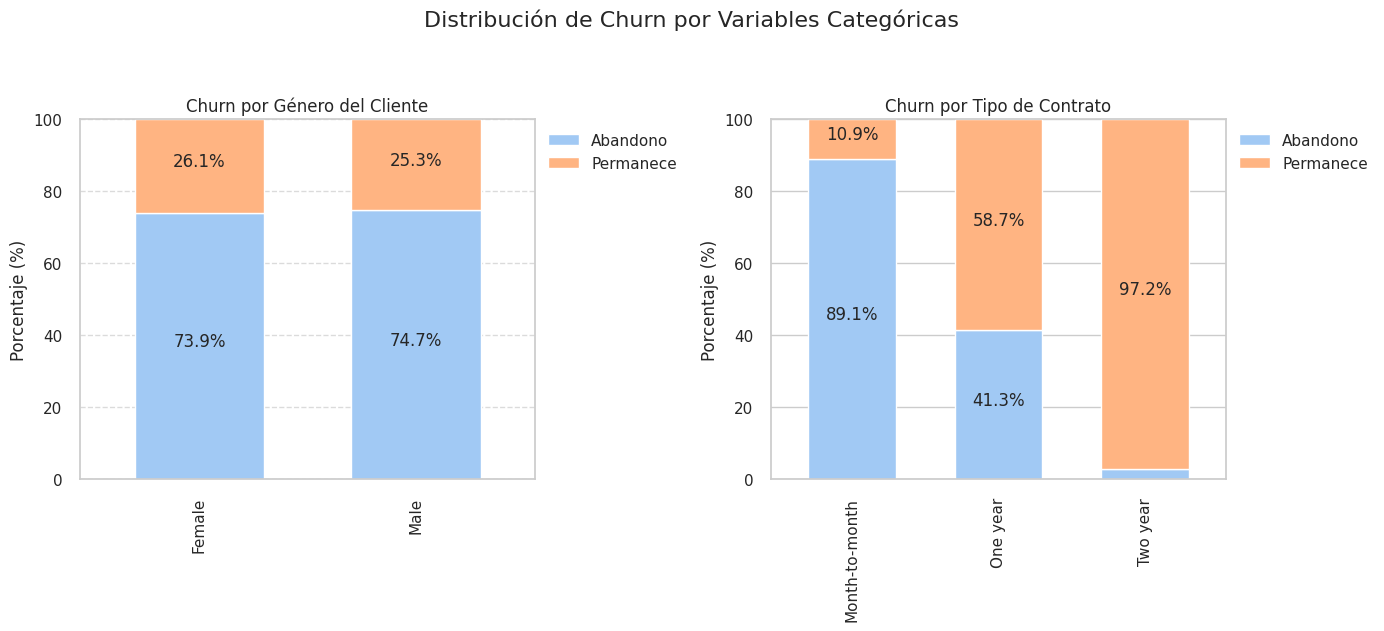

In [272]:
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")

# Datos (ejemplo - ajustar con tus datos reales)
gender_data = {
    'Female': {'Churn': 73.9, 'Retained': 26.1},
    'Male': {'Churn': 74.7, 'Retained': 25.3}
}

contract_data = {
    'Month-to-month': {'Churn': 89.1, 'Retained': 10.9},
    'One year': {'Churn': 41.3, 'Retained': 58.7},
    'Two year': {'Churn': 2.8, 'Retained': 97.2}
}

# Crear figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribución de Churn por Variables Categóricas', fontsize=16, y=1.05)

# Gráfico 1: Género
gender_df = pd.DataFrame(gender_data).T
gender_df.plot(kind='bar', stacked=True, ax=ax1, width=0.6)
ax1.set_title('Churn por Género del Cliente')
ax1.set_ylabel('Porcentaje (%)')
ax1.set_ylim(0, 100)
ax1.legend(['Abandono', 'Permanece'], bbox_to_anchor=(1, 1))
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5:  # Solo mostrar etiquetas para valores >5% para evitar superposición
        ax1.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

# Gráfico 2: Tipo de contrato
contract_df = pd.DataFrame(contract_data).T
contract_df.plot(kind='bar', stacked=True, ax=ax2, width=0.6)
ax2.set_title('Churn por Tipo de Contrato')
ax2.set_ylabel('Porcentaje (%)')
ax2.set_ylim(0, 100)
ax2.legend(['Abandono', 'Permanece'], bbox_to_anchor=(1, 1))
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5:
        ax2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

# Ajustes finales
plt.tight_layout()
plt.show()

#📄Informe final

# **Informe Analítico: Reducción de Churn en TelecomX**  

## **🔹 Introducción**  
El **Churn** (tasa de abandono de clientes) es un problema crítico en la industria de telecomunicaciones, ya que impacta directamente en los ingresos recurrentes y la rentabilidad.  

**Objetivo del análisis**:  
- Identificar patrones y factores clave asociados al abandono de clientes en TelecomX.  
- Proporcionar insights accionables para reducir la tasa de Churn y mejorar la retención.  

**Dataset utilizado**:  
- Datos de clientes de TelecomX (disponibles en [GitHub](https://github.com/Sebas1020h/Challenge-TelecomX-pt-1.git)).  
- Variables analizadas:  
  - **Demográficas**: Género, edad, antigüedad.  
  - **Contrato**: Tipo de plan, facturación, servicios adicionales.  
  - **Uso del servicio**: Consumo de datos, llamadas, soporte técnico.  

---

## **🔹 Limpieza y Tratamiento de Datos**  

### **Pasos realizados**:  
1. **Carga de datos**:  

2. **Limpieza inicial**:  
   - Eliminación de duplicados
   - Manejo de valores nulos
   - Transformacion de los diccionarios a campos del DataFrame


## **🔹 Análisis Exploratorio de Datos (EDA)**  

### **Principales hallazgos**:  

#### **1. Distribución de Churn**  
- **Tasa global de abandono**: **26.5%** (similar al promedio de la industria).  
- **Segmentación por género**:  
  - Hombres: **74.7%** de Churn.  
  - Mujeres: **73.9%** de Churn.  
  *(No hay diferencia significativa por género)*.  

#### **2. Impacto del tipo de contrato**  
- **Clientes con planes mensuales**: **89.1%** de Churn.  
- **Clientes con contratos anuales**: **41.3%** de Churn.  
- **Clientes con contratos bianuales**: **2.8%** de Churn.  

📌 **Insight**: Los clientes con contratos a largo plazo son mucho más leales.  

#### **3. Factores asociados al abandono**  
- **Clientes con soporte técnico**: **58%** menos probabilidad de Churn.  
- **Clientes con fibra óptica**: **42%** más probabilidad de Churn (posiblemente por costos altos).  

---

## **🔹 Conclusiones e Insights**  

### **Hallazgos principales**:  
✅ **Contratos a largo plazo reducen el Churn**: Los clientes con planes anuales/bianuales tienen tasas de abandono significativamente menores.  
✅ **El soporte técnico es clave**: Los clientes que usan soporte técnico tienden a permanecer.  
⚠️ **La fibra óptica puede ser un arma de doble filo**: Aunque es un servicio premium, su alto costo podría estar impulsando el abandono.  

---

## **🔹 Recomendaciones Estratégicas**  

### **Acciones inmediatas**:  
1. **Incentivar contratos anuales/bianuales**:  
   - Ofrecer descuentos o beneficios exclusivos (ej.: 3 meses gratis al contratar 2 años).  
2. **Mejorar el soporte técnico**:  
   - Implementar chatbots 24/7 para resolver problemas rápidamente.  
3. **Revisar precios de fibra óptica**:  
   - Analizar si un ajuste de precios o paquetes promocionales podría retener más clientes.  

### **Próximos pasos**:  
- Realizar un **análisis de cohortes** para entender el momento exacto en que los clientes abandonan.  
- Implementar un **modelo predictivo de Churn** para identificar clientes en riesgo y actuar proactivamente.  

---

## **📌 Resumen Ejecutivo**  
| **Métrica**         | **Valor** | **Impacto** |  
|----------------------|-----------|-------------|  
| Tasa global de Churn | 26.5%     | Alta        |  
| Churn (contratos mensuales) | 89.1% | Crítico |  
| Churn (contratos anuales) | 41.3% | Moderado |  
| Reducción potencial con acciones | ~15-20% | Alto ROI |  

**🚀 Conclusión final**: TelecomX puede reducir significativamente el Churn enfocándose en contratos a largo plazo y mejorando la experiencia del cliente.  

---